## q-1
#### Use different distance measures as applicable.  Plot graph to report accuracy with change  in  value  of  K.

In [34]:
import numpy as np
from numpy import log2 as log
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import operator
import sys

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

#### Here we use inbuilt library KNeighborsClassifier to implement the knn classifier
#### We got accuracy score with inbuit library as 0.95625
#### We obeseve that result given by inbuit LIbrary is pretty faster than our own algorithm
#### Implementation of kd tree can be reason behind it


In [35]:
# filename = sys.argv[1]
dataset = pd.read_csv('/home/gsmodi/2SMAI/Assignment1 Dataset/Datasets/q1/train.csv',header=None)
X = dataset.iloc[:, 1: 785].values        #independent variables
Y = dataset.iloc[:, 0].values             #dependent variables


 
    


# In[4]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
y_test=Y_test.tolist()
s1 = pd.Series([X_train])
s2 = pd.Series([Y_train])
df1=pd.concat([s1, s2],axis=1)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
p = neigh.predict(X_test)
print (confusion_matrix(Y_test,p))
print (classification_report(Y_test,p))
print (accuracy_score(Y_test,p))

[[411   0   0   0   0   1   2   0   0   0]
 [  0 456   1   0   1   0   0   1   0   0]
 [  3   6 368   3   0   0   1   8   1   1]
 [  2   3   3 399   0   3   0   2   2   2]
 [  0   3   0   0 334   0   0   0   0   9]
 [  2   3   2   2   1 365   5   0   1   3]
 [  1   1   0   0   1   1 380   0   0   0]
 [  0   4   0   0   2   0   0 401   1   4]
 [  1  12   1   6   5   7   3   0 341   8]
 [  2   0   1   2   3   0   0   6   0 396]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       414
           1       0.93      0.99      0.96       459
           2       0.98      0.94      0.96       391
           3       0.97      0.96      0.96       416
           4       0.96      0.97      0.96       346
           5       0.97      0.95      0.96       384
           6       0.97      0.99      0.98       384
           7       0.96      0.97      0.97       412
           8       0.99      0.89      0.93       384
           9       0.94     

#### As the name suggest functions are calculating manahattan distance
#### Below line use the numpy array broadcasting 
#### This helps us to get result of distance as early as possible

In [36]:
def manhattan_distance(a, b):
    res=np.sum(abs(a-b),axis=1)
  
    
    return res
    

#### Here also, we used the concept of broadcasting and it returns the result as list of eucledian distance w.r.t all rows in training dataset

In [37]:
def euclidean_distance(a,b):
    res=np.sqrt(np.sum((a-b)**2,axis=1))

    return res

In [38]:
def distance(x, y, flag):
    if flag==1:
        return euclidean_distance(x,y)
    else:
        return manhattan_distance(x,y)

#### Here, we implemented our knn classifier  by finding list of distances using function declared above and then selecting first k minimum values from the list

In [39]:
def predict(x_train,y_train,x_test,k,flag):
    res=[]
    ytrain=y_train.flatten()
    pnt1=np.array(x_train)
    for rowtest in x_test:
        dist= distance(pnt1,rowtest,flag)
        dist1=dist.flatten()
        a = np.concatenate((dist1.reshape(-1,1),ytrain.reshape(-1,1)),axis=1)
        a = a[a[:,0].argsort()]
        classes= set(y_train)
        d={}
        for c in classes:
            d[c]=0
        for i in range(k):
            label= a[i][1]
            d[label] = d[label]+1
        maxv=0
        for i in d:
            if(d[i]>maxv):
                maxv=d[i]
                key=i
        res.append(key)

    return res

In [40]:
re=predict(X_train,Y_train,X_test,5,1)

print (confusion_matrix(y_test,re,labels=np.unique(re)))
print (classification_report(y_test,re,labels=np.unique(re)))
print (accuracy_score(y_test,re))

[[411   0   0   0   0   1   2   0   0   0]
 [  0 456   1   0   1   0   0   1   0   0]
 [  3   6 368   3   0   0   1   8   1   1]
 [  2   3   3 399   0   3   0   2   2   2]
 [  0   3   0   0 334   0   0   0   0   9]
 [  2   3   2   2   1 365   5   0   1   3]
 [  1   1   0   0   1   1 380   0   0   0]
 [  0   4   0   0   2   0   0 401   1   4]
 [  1  12   1   6   5   7   3   0 341   8]
 [  2   0   1   2   3   0   0   6   0 396]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       414
           1       0.93      0.99      0.96       459
           2       0.98      0.94      0.96       391
           3       0.97      0.96      0.96       416
           4       0.96      0.97      0.96       346
           5       0.97      0.95      0.96       384
           6       0.97      0.99      0.98       384
           7       0.96      0.97      0.97       412
           8       0.99      0.89      0.93       384
           9       0.94     

#### We experiment on different values of K to check  how ot varies with respect to K for both the type of distances

Text(0.5, 1.0, 'k vs accuracy')

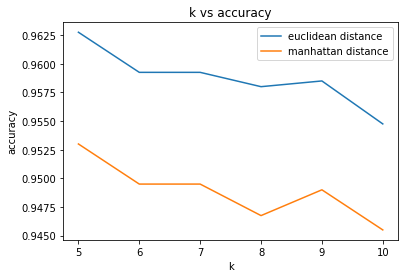

In [41]:
x_axis = [ i for i in range(5,11)]
pe = []
pc = []
pm = []

for j in x_axis:
    t = predict(X_train,Y_train,X_test,j,1)
    pe.append(accuracy_score(Y_test,t))
    
for j in x_axis:
    t = predict(X_train,Y_train,X_test,j,3)
    pm.append(accuracy_score(Y_test,t))
    
fig,ax = plt.subplots()
ax.plot(x_axis, pe, label="euclidean distance")
ax.plot(x_axis, pm, label="manhattan distance")
ax.legend()
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.set_title("k vs accuracy")

In [42]:
print(pe)

[0.96275, 0.95925, 0.95925, 0.958, 0.9585, 0.95475]


In [43]:
print(pm) 

[0.953, 0.9495, 0.9495, 0.94675, 0.949, 0.9455]


## Observations
    1. Eucledean result give better result than manhattan distance 
    2. Accuracy slightly varies as K value changes
    3. We have nearly same value of accuracy as provided by Sklearn Library 